# HW 2

*by Vasyukevich Andrey*

### Imports

In [1]:
import numpy as np
import pandas as pd
import scipy
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

a. Загрузите датасет с kaggle:
https://www.kaggle.com/kaggle/hillary-clinton-emails

b. Изучите, из чего состоит датасет.

In [2]:
aliases_csv = pd.read_csv('Aliases.csv')

In [3]:
aliases_csv.head()

,Id,Alias,PersonId
0,1,111th congress,1
1,2,agna usemb kabul afghanistan,2
2,3,ap,3
3,4,asuncion,4
4,5,alec,5


In [4]:
email_receivers_csv = pd.read_csv('EmailReceivers.csv')

In [5]:
email_receivers_csv.head()

,Id,EmailId,PersonId
0,1,1,80
1,2,2,80
2,3,3,228
3,4,3,80
4,5,4,80


In [6]:
emails_csv = pd.read_csv('Emails.csv')

In [7]:
emails_csv.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [8]:
persons_csv = pd.read_csv('Persons.csv')

In [9]:
persons_csv.head()

,Id,Name
0,1,111th Congress
1,2,AGNA USEMB Kabul Afghanistan
2,3,AP
3,4,ASUNCION
4,5,Alec


c. Предобработайте тексты как сочтете правильным для первых
экспериментов. Опишите, как вы его предобрабатываете, и почему
так в блокноте в markdown ячейке

### ANSWER
Убрал пустые письма
Разделил письма на слова, убрав пунктуацию, слова с пунктуацией, стопслова, слова с длиной < 3, и слова из прописных символов (ими оканчивались большинство писем)
Также отфильтровал письма, в которых в итоге осталось меньше трех слов.

In [10]:
emails = emails_csv['ExtractedBodyText'].values

In [11]:
emails[:5]

array([nan,
       'B6\nThursday, March 3, 2011 9:45 PM\nH: Latest How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx\nMarch 3, 2011\nFor: Hillary',
       'Thx', nan,
       'H <hrod17@clintonemail.com>\nFriday, March 11, 2011 1:36 PM\nHuma Abedin\nFw: H: Latest: How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx\nPis print.'], dtype=object)

In [12]:
emails = emails[~pd.isnull(emails)]

In [14]:
emails[:5]

array([ 'B6\nThursday, March 3, 2011 9:45 PM\nH: Latest How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx\nMarch 3, 2011\nFor: Hillary',
       'Thx',
       'H <hrod17@clintonemail.com>\nFriday, March 11, 2011 1:36 PM\nHuma Abedin\nFw: H: Latest: How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx\nPis print.',
       "Pis print.\n-•-...-^\nH < hrod17@clintonernailcom>\nWednesday, September 12, 2012 2:11 PM\n°Russorv@state.gov'\nFw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots\nFrom [meat)\nSent: Wednesday, September 12, 2012 01:00 PM\nTo: 11\nSubject: Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots\nhtte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-anti-musiim-tihn-that-sparked-\ndeadly-riots/\nSent from my Verizon Wireless 4G LTE DROID\nU.S. Department of State\nCase No. F-2015-04841\nDoc N

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string

In [16]:
punctuation = set(string.punctuation)
stop_words = set(stopwords.words("english")) # | { 'am', 'pm' }
lemmatizer = nltk.WordNetLemmatizer()

def email_to_words(email):
    words = []
    for sentence in sent_tokenize(email):
        for token in word_tokenize(sentence):
            if (len(token) > 2) and (not (set(token) & punctuation)) and \
               (token not in stop_words) and (token.upper() != token or token.isdigit()):
                words.append(lemmatizer.lemmatize(token.lower()))
    return np.asarray(words)

In [17]:
email_to_words(emails[0])

array(['thursday', 'march', '2011', 'latest', 'how', 'syria', 'aiding',
       'qaddafi', 'sid', 'hrc', 'memo', 'syria', 'aiding', 'libya', 'hrc',
       'memo', 'syria', 'aiding', 'libya', 'march', '2011', 'for',
       'hillary'], 
      dtype='<U8')

In [18]:
from collections import namedtuple

In [19]:
words = np.asarray(list(map(email_to_words, emails)))

In [20]:
print(words[0])

['thursday' 'march' '2011' 'latest' 'how' 'syria' 'aiding' 'qaddafi' 'sid'
 'hrc' 'memo' 'syria' 'aiding' 'libya' 'hrc' 'memo' 'syria' 'aiding'
 'libya' 'march' '2011' 'for' 'hillary']


In [21]:
print(emails[0], '\n', words[0])

B6
Thursday, March 3, 2011 9:45 PM
H: Latest How Syria is aiding Qaddafi and more... Sid
hrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx
March 3, 2011
For: Hillary 
 ['thursday' 'march' '2011' 'latest' 'how' 'syria' 'aiding' 'qaddafi' 'sid'
 'hrc' 'memo' 'syria' 'aiding' 'libya' 'hrc' 'memo' 'syria' 'aiding'
 'libya' 'march' '2011' 'for' 'hillary']


In [22]:
from collections import Counter
word_counts = Counter(sum(map(list, words), []))

In [23]:
def filter_rare_words(words):
    return np.asarray(list(filter(lambda word: word_counts[word] > 2, words)))

In [24]:
words = np.asarray(list(map(filter_rare_words, words)))

(array([ 1692.,  1152.,   883.,   649.,   418.,   316.,   215.,   165.,
          113.,  1139.]),
 array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.]),
 <a list of 10 Patch objects>)

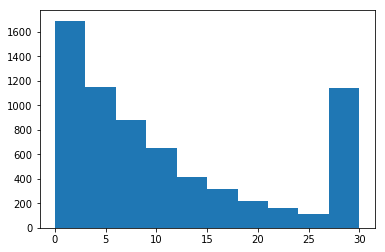

In [25]:
plt.hist(list(map(lambda word: min(30, len(word)), words)))

In [26]:
inds = list(map(lambda e: len(e) > 2, words))

In [27]:
sum(inds)

5050

In [28]:
emails = emails[inds]
words = words[inds]

In [29]:
print(len(emails))

5050


d. Выясните, какие биграммы чаще всего встречаются в датасете

In [30]:
from collections import Counter
counter = Counter(sum(map(list, map(nltk.bigrams, words)), []))

In [31]:
items = sorted(counter.items(), key=lambda t: t[1], reverse=True)

In [32]:
items[:15]

[(('secretary', 'office'), 459),
 (('state', 'department'), 449),
 (('united', 'state'), 447),
 (('white', 'house'), 414),
 (('department', 'state'), 360),
 (('office', 'secretary'), 324),
 (('secretary', 'state'), 251),
 (('doc', 'date'), 224),
 (('new', 'york'), 218),
 (('private', 'residence'), 216),
 (('case', 'doc'), 215),
 (('state', 'case'), 212),
 (('mill', 'cheryl'), 212),
 (('let', 'know'), 179),
 (('health', 'care'), 167)]

e. Попробуйте выделить коллокации из двух слов по PMI с помощью nltk
(примеры можно найти по ссылке:
http://www.nltk.org/howto/collocations.html)

In [33]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [34]:
all_words = sum(map(list, words), [])
len(all_words)

294150

In [35]:
finder = nltk.collocations.BigramCollocationFinder.from_words(all_words)

In [36]:
collocations = finder.nbest(bigram_measures.pmi, 150)

In [37]:
collocations

[('har', 'homa'),
 ('hardship', 'waiver'),
 ('hong', 'kong'),
 ('phd', 'purdue'),
 ('tunku', 'varadarajan'),
 ('ardebil', 'isfahan'),
 ('ashfaq', 'parvez'),
 ('hormozegan', 'hamedan'),
 ('markezi', 'hormozegan'),
 ('nuestras', 'hijas'),
 ('sitio', 'colosio'),
 ('243', '8054'),
 ('abdul', 'ghani'),
 ('cardinal', 'stadium'),
 ('hubert', 'humphrey'),
 ('lame', 'duck'),
 ('pmmeeting', 'pmsecretary'),
 ('puerto', 'rico'),
 ('resistant', 'striga'),
 ('sheikh', 'jarrah'),
 ('courthouse', 'newry'),
 ('courtroom', 'idle'),
 ('cyrenaica', 'barge'),
 ('detected', 'noxious'),
 ('eden', 'fortress'),
 ('famously', 'solicited'),
 ('inked', 'lucrative'),
 ('neil', 'howe'),
 ('noxious', 'fume'),
 ('olive', 'grove'),
 ('pig', 'fiasco'),
 ('tableau', 'fearsome'),
 ('trey', 'grayson'),
 ('brent', 'scowcroft'),
 ('chico', 'menashe'),
 ('colosio', 'valle'),
 ('costa', 'rica'),
 ('golestan', 'gilan'),
 ('ilam', 'bushehr'),
 ('isfahan', 'ilam'),
 ('khuzestan', 'zanjan'),
 ('kordestan', 'kerman'),
 ('omni', 's

In [38]:
mweTokenizer = nltk.tokenize.MWETokenizer(collocations)

In [39]:
words = np.asarray(list(map(mweTokenizer.tokenize, words)))

f. Выполните любую несложную кластеризацию писем (не тратьте на
этот шаг много времени)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.metrics import silhouette_score

In [41]:
emails_from_words = list(map(lambda l: ' '.join(l), words))

In [ ]:
# Выбран TfidfVectorizer, так как CountVectorizer все письма относил к одному кластеру.

In [44]:
# vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 3))

In [45]:
X = vectorizer.fit_transform(emails_from_words)

In [46]:
for k in range(2, 15):
    est = KMeans(n_clusters=k, algorithm='full').fit(X)
    print(k, '\t', silhouette_score(X, est.labels_))
    print(Counter(est.labels_))

2 	 0.00327123250497
Counter({1: 4974, 0: 76})
3 	 0.00396472195512
Counter({0: 4623, 2: 351, 1: 76})
4 	 0.00402314875001
Counter({0: 4180, 3: 516, 2: 278, 1: 76})
5 	 0.00542285090715
Counter({1: 4083, 4: 508, 0: 321, 3: 76, 2: 62})
6 	 0.00588842293872
Counter({2: 3945, 5: 444, 1: 375, 3: 148, 4: 76, 0: 62})
7 	 0.00629200194776
Counter({1: 3802, 4: 540, 2: 214, 6: 196, 3: 152, 5: 76, 0: 70})
8 	 0.00680326838138
Counter({2: 3493, 3: 530, 4: 436, 0: 167, 5: 153, 6: 133, 7: 76, 1: 62})
9 	 0.00704136175662
Counter({1: 3717, 2: 425, 0: 412, 6: 142, 7: 102, 4: 100, 8: 76, 3: 40, 5: 36})
10 	 0.00820514270356
Counter({3: 3523, 6: 453, 1: 383, 8: 191, 9: 152, 7: 148, 5: 76, 2: 71, 4: 39, 0: 14})
11 	 0.00950287596626
Counter({7: 2734, 10: 793, 8: 467, 0: 404, 6: 153, 3: 136, 1: 135, 9: 76, 4: 68, 5: 62, 2: 22})
12 	 0.00945048035511
Counter({9: 3533, 6: 322, 10: 211, 7: 187, 4: 180, 5: 148, 8: 148, 3: 122, 2: 76, 11: 62, 1: 39, 0: 22})
13 	 0.00952889732936
Counter({9: 3216, 8: 412, 3: 2

In [ ]:
# Число кластеров выбрал почти рандомно (по уменьшению размера макс. кластера), так как silhouette_score не показался значимым.

In [48]:
labels = KMeans(n_clusters=8, algorithm='full').fit(X).labels_
print(Counter(labels))

Counter({7: 3589, 2: 549, 6: 427, 5: 152, 1: 147, 3: 76, 0: 62, 4: 48})


g. Придумайте, как визуализировать содержание кластеров. Например,
можно выводить самые частые слова из каждого кластера (но,
вероятно, это не самая удачная идея). Визуализируйте ту
кластеризацию, которая у вас уже получилась.

In [49]:
# Выводим размеры кластеров

In [51]:
print(sorted(Counter(labels).items()))

[(0, 62), (1, 147), (2, 549), (3, 76), (4, 48), (5, 152), (6, 427), (7, 3589)]


In [52]:
# Выводим распределение длин писем по кластерам

In [53]:
for label in range(len(set(labels))):
    lens = []
    for x, labelx in zip(X, labels):
        if labelx == label:
            lens.append(len(x.data))
    print(label)
    print(np.mean(lens), np.std(lens))

0
40.1451612903 16.7840619235
1
33.9115646259 16.7002078158
2
28.9744990893 33.3160513393
3
139.013157895 98.8178139466
4
61.5416666667 31.085874561
5
30.6710526316 15.3296137194
6
30.6088992974 40.0861392814
7
188.08470326 682.468566847


In [54]:
top_n = 15

In [55]:
def get_word_by_sparse_ind(ind, vectorizer):
    tmp = scipy.sparse.csr.csr_matrix(([1], ([0], [ind])))
    return vectorizer.inverse_transform(tmp)[0][0]

In [56]:
# Выводим самые популярные слова в кластеров с учетом их частоты, взвешенные с весом tfidf. 

In [69]:
for label in range(len(set(labels))):
    ind_to_tfidf = {}
    for x, labelx in zip(X, labels):
        if labelx == label:
            for ind, data in zip(x.indices, x.data):
                if ind not in ind_to_tfidf:
                    ind_to_tfidf[ind] = 0
                ind_to_tfidf[ind] += data
    items = sorted(ind_to_tfidf.items(), key=lambda t: t[1], reverse=True)
    inds = list(zip(*items))[0][:top_n]
    print(label)
    print(' '.join(map(lambda ind: '-'.join(get_word_by_sparse_ind(ind, vectorizer).split()), inds)))

0
valmoro lona-valmoro lona assistant-secretary-state assistant-secretary assistant lona-valmoro-special valmoro-special valmoro-special-assistant secretary-state special-assistant special-assistant-secretary special secretary state
1
abedin huma abedin-huma abedinh abedin-huma-abedinh huma-abedinh 2009 august-2009 august huma-abedinh-saturday abedinh-saturday saturday 2010 huma-abedin sunday
2
call pls print pls-print pi call-sheet add sheet hrod17 print-hrod17 call-list thx ops list will
3
secretary-office secretary office office-secretary room secretary-office-secretary route state-department residence office-secretary-office department private-residence private state conference-room
4
please immediate-assistance assistance-please immediate-assistance-please need-immediate need-immediate-assistance immediate assistance need please-contact please-call contact access-email assistance-please-call traveling
5
mill cheryl-millscd mill-cheryl-millscd mill-cheryl millscd cheryl 2009 cheryl

In [89]:
# Альтернативный способ выбора топ слов.
# Объединяем каждый кластер в один документ, пересчитываем tfidf и опять выводим топ слов.
# // Способ менее удачен по сравнению с предыдущим, так как он отдает предпочтение частым словам.

In [90]:
def form_clusters(X, labels, emails_from_words):
    clusters = ['' for i in range(len(set(labels)))]
    for i, (x, label) in enumerate(zip(X, labels)):
        clusters[label] += emails_from_words[i] + ' '
    return clusters

In [91]:
clusters = form_clusters(X, labels, emails_from_words)

In [92]:
clusters_vectorizer = TfidfVectorizer()

In [93]:
X_clusters = clusters_vectorizer.fit_transform(clusters)

In [94]:
for cluster, label in zip(X_clusters, range(X_clusters.shape[0])):
    ind_data = list(zip(cluster.indices, cluster.data))
    ind_data.sort(key=lambda t: t[1], reverse=True)
    inds = list(zip(*ind_data))[0][:top_n]
    print(label)
    print(' '.join(map(lambda ind: '-'.join(get_word_by_sparse_ind(ind, clusters_vectorizer).split()), inds)))

0
valmoro assistant lona state special secretary direct 202 ecial will yes hillary clinton would like
1
abedinh huma abedin 2009 august 2010 saturday call sunday september thursday wednesday sullivan may jacob
2
call pls print pi also sheet hrod17 add want thx back list tomorrow will today
3
office secretary room department route private residence state conference house airport floor treaty white outer
4
immediate please assistance access need recipient contact fe80 message system microsoft diagnostic toiv email laszczych
5
millscd mill cheryl 2009 fyi 2010 friday april saturday cdm thursday august see jacob may
6
talk can what call want tomorrow also get would time know work today thx send
7
the said obama would state one president republican also party american year but people new


h. Поработайте с признаками и методом кластеризации так, чтобы
кластеры выглядели наиболее интерпретируемыми.

In [97]:
# Было сделано в предыдущих пунктах.

In [98]:
# Кластеры уже выглядят достаточно интерпретируемыми, по крайней мере даже по топовым словам видна смысловая разница.

i. Придумайте, как оценить интерпретируемость кластеров с помощью
асессоров (какие вопросы задавать, как подсчитать качество на
основе ответов). Для эксперимента воспользуйтесь кем-то из
однокурсников в качестве асессора, и оцените интерпретируемость
вашей кластеризации. Имейте ввиду, что такая оценка разумеется не
статзначима и по-хорошему нужно привлекать более одного
асессора, но протестировать придуманный вами способ оценки до
какой-то степени так можно. Опишите ваш способ оценить
интерпретируемость кластеризации и результаты в markdown ячейке
в вашем ipython notebook.

### ANS
Возьмем два различных кластера и из каждого возмем по N случайных текстов и попросим асессора разделить письма на 2 класса.
Можно повторять много раз.
Несколько экспериментов показали хорошую различимость классов, например в один класс попали письма-расписания, в другой - письма от Mills, Cheryl D (ассистент? адвокат? Хиллари Клинтон), в третий стандартные сообщения о недаче отправки/получения и т. д.

In [99]:
import random

In [101]:
def random_samples(label, n, emails, labels):
    inds = [i for i, (e, l) in enumerate(zip(emails, labels)) if l == label]
    t = list(random.sample(inds, n))
    return emails[t]

In [113]:
random.seed('121')

In [120]:
label1, label2 = random.sample(list(range(len(set(labels)))), 2)
print(label1, label2)

1 4


In [121]:
samples1 = random_samples(label1, 5, emails, labels)
samples2 = random_samples(label2, 5, emails, labels)

In [122]:
samples = list(samples1) + list(samples2)
random.shuffle(samples)

In [123]:
d = '\n' + '=' * 80 + '\n'

In [124]:
print(d.join(samples))

Abedin, Huma <AbedinH@state.gov>
Saturday, November 28, 2009 5:14 PM
H
Fw: Quint fms
I'm going to
propose separate bilats with relevant countries. You ok with proceeding that way?
Delivery has failed to these recipients or distribution lists:
mhcalejaftstate.gov
The recipient's e-mail address was not found in the recipient's e-mail system. Microsoft Exchange will not try to redeliver
this message for you. Please check the e-mail address and try resending this message, or provide the following diagnostic
text to your system administrator.
Diagnostic information for administrators:
Generating server: MSWASHDCIB03.washdc.state.sbu
mhcaleja@state.gov
it< #5.1.1> #SMTP#
Original message headers:
Received: from vance2.state.gov ([10.4.16.238]) by
MSWASHDCIB03.washdc.state.sbu with Microsoft SMTPSVC(6.0.3790,3959); Sun, 3
Jan 2010 18:36:58 -0500
Received: from mail.clintonemail.com (ool-i8bbeabb.static.opton1ine.net [24.187.234.187])
by vance2.state.gov with ESMTP id o03NBEEh019168
for (mhcal

In [125]:
print(d.join(samples1))

Abedin, Huma <AbedinH@state.gov>
Saturday, December 26, 2009 2:28 PM
Re: (Reuters) Taliban Planned to Use Americans In Pakistan Attacks
Abedin, Huma <AbedinH@state.gov>
Saturday, November 28, 2009 5:14 PM
H
Fw: Quint fms
I'm going to
propose separate bilats with relevant countries. You ok with proceeding that way?
Abedin, Huma <AbedinH@state.gov>
Wednesday, August 11, 2010 9:51 AM
Ebeling, Betsy; H; Huma Abedin; Russo, Robert V
RE:
He wrote a very beautiful email for hrc which we just printed for her
Abedin, Huma <AbedinH@state.gov>
Sunday, August 23, 2009 9:17 AM
H
Fw: South Korea's Lee meets North Korean delegation (AP)
9nm.
Griginal Message
Fro : H <HDR22@clintonemail.corri>
To: Abedin, Huma
r;lu Sep 17 21:46:38 2009
Subject: Re: Notes
the. p!nn,tcrnorrnw ntrh.t?
C;(0(.6;;
Abedin, <Abedinfl@state.gov>
Yo:
Sep 17 2.:4:5:01 2005
koy,
Speech has been faxed
For t,Jazirrciw:


In [126]:
print(d.join(samples2))

I am currently out of the office but checking email periodically.
If you need immediate assistance, please call 202-647-9572. Thank you!
1 nR
I am currently out of the office. If you need immediate assistance, please contact Joanne Laszczych
(LaszczychJ@state.gov) at 202-647-5548.
Thank you
cdm
I am on travel and will not return to the office until Tuesday, July 6. If you need immediate assistance please contact
Marisa McAuliffe by phone at 202-647-2972 or email at McauliffeMS@state.gov.
Delivery has failed to these recipients or distribution lists:
schwerind@state.gov
The recipient's e-mail address was not found in the recipient's e-mail system. Microsoft Exchange will not try to redeliver
this message for you. Please check the e-mail address and try resending this message, or provide the following diagnostic
text to your system administrator.
Diagnostic information for administrators:
Generating server: MSWASHDCIB01.washdc.state.sbu
schwerind@state.gov
#< #5.1.1> #SMTP#
Original mess